#Natural Language Processing with Disaster Tweets#
 - Predict which Tweets are about real disasters and which ones are not

In [ ]:
!pip install transformers
!pip install pandas
!pip install numpy
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Tweet Classification using  BERT (Bidirectional Encoder Representations from Transformers) #

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import pandas as pd

In [ ]:


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop(['location', 'keyword'], axis=1, inplace=True)
test.drop(['location', 'keyword'], axis=1, inplace=True)


 - Although Scikit-learn provides a variety of traditional machine learning algorithms for classification tasks, such as Logistic Regression, Support Vector Machines (SVM), Random Forests, and Naive Bayes classifiers, more advanced algorithms ould be bet for the instant task. While these models can be useful for certain text classification tasks, they typically perform worse than state-of-the-art deep learning models like BERT, especially when it comes to complex NLP tasks or tasks with large amounts of training data.

 - The main reason for this is that traditional machine learning models rely on handcrafted features, such as TF-IDF or bag-of-words, to represent the text. These feature representations often fail to capture the rich semantic and syntactic information present in the text. In contrast, BERT and other transformer-based models are pre-trained on a large corpus of text using self-supervised learning objectives, allowing them to learn powerful contextual representations of words and sentences.

 - Furthermore, BERT and similar models can easily transfer the knowledge gained during pre-training to new tasks through fine-tuning, which is known as transfer learning. This capability often results in better performance on the target task, even with limited labeled data.

 - In summary, while scikit-learn provides a variety of useful classification algorithms, they are likely to yield worse results than BERT or other transformer-based models for the tweet classification task you are working on. That said, if you have limited computational resources, or if you need a lightweight model for deployment, you might consider using a scikit-learn classifier as a more computationally efficient alternative. Just be aware that the performance might be lower than that of a fine-tuned BERT model.





 - To use BERT tokenization to solve the given NLP problem, you can follow these steps:

 - Load the train and test data from the CSV files using a library like Pandas.
Preprocess the text data by removing any unnecessary characters or words, converting all text to lowercase, and performing any other necessary cleaning operations.
 - Use the BERT tokenizer from the transformers library to tokenize the text data. You can load a pre-trained BERT model from the transformers library and use its tokenizer to tokenize the text data. The tokenizer will convert each input text into a sequence of token IDs that can be fed into the BERT model for further processing.
Pad or truncate the tokenized sequences to a fixed length so that they can be fed into the BERT model in batches of the same size.
Create a PyTorch or TensorFlow dataset object to feed the tokenized and padded/truncated sequences into a BERT model for training or prediction.

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3263 non-null   int64 
 1   text    3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [ ]:
train.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [ ]:
test.text

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

The presence of special characters in the tweet classification task can potentially affect the accuracy of the predictions. Special characters, such as emojis, hashtags, and mentions, can provide additional context or sentiment information that could be helpful for the classification task.

However, the impact of special characters on the accuracy of predictions depends on the specific model being used and how it handles these characters. The BERT model is designed to handle various types of input text, including special characters.

BERT tokenizes the input text into subwords or characters, which allows it to handle special characters and out-of-vocabulary words effectively. This means that the presence of special characters in the input text should not significantly degrade the performance of the BERT model.

Nevertheless, it's helpful to preprocess the input data properly, taking into account the specific characteristics of the text and the task at hand. For example, if you find that certain special characters or emojis provide valuable information for the classification task, you can include them during preprocessing. On the other hand, if some special characters are noise and don't contribute to the classification, you can choose to remove them during preprocessing.

Moreover, the presence of special characters can affect the accuracy of predictions, but, the impact depends on the model and how well it can handle these characters. Here, in the BERT model, the presence of special characters should not significantly affect the performance if input data is appropriately preprocessed.








In [ ]:
def convert_data_to_examples(data, targets):
    input_examples = []
    for i in range(len(data)):
        example = InputExample(
            guid=None,
            text_a=data[i],
            text_b=None,
            label=targets[i]
        )
        input_examples.append(example)
    return input_examples


In [ ]:
train_input_examples = convert_data_to_examples(train['text'], train['target'])
#print(train_input_examples)

In [ ]:
def convert_examples_to_features(input_examples, tokenizer, max_seq_length):
    input_features = []
    for example in input_examples:
        tokens = tokenizer.tokenize(example.text_a)

        if len(tokens) > max_seq_length - 2:
            tokens = tokens[: (max_seq_length - 2)]

        tokens = ['[CLS]'] + tokens + ['[SEP]']
        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        attention_mask = [1] * len(input_ids)
        token_type_ids = [0] * len(input_ids)

        padding_length = max_seq_length - len(input_ids)

        input_ids += [0] * padding_length
        attention_mask += [0] * padding_length
        token_type_ids += [0] * padding_length

        assert len(input_ids) == max_seq_length
        assert len(attention_mask) == max_seq_length
        assert len(token_type_ids) == max_seq_length

        features = InputFeatures(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            label=example.label,
        )
        input_features.append(features)
    return input_features


In [ ]:
train_input_examples = convert_data_to_examples(train['text'], train['target'])


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_seq_length = 128

train_input_features = convert_examples_to_features(train_input_examples, tokenizer, max_seq_length)


In [ ]:
def create_dataset(input_features):
    all_input_ids = []
    all_attention_mask = []
    all_token_type_ids = []
    all_labels = []

    for feature in input_features:
        all_input_ids.append(feature.input_ids)
        all_attention_mask.append(feature.attention_mask)
        all_token_type_ids.append(feature.token_type_ids)
        all_labels.append(feature.label)

    return tf.data.Dataset.from_tensor_slices(
        (
            {
                "input_ids": tf.constant(all_input_ids, shape=(len(all_input_ids), max_seq_length), dtype=tf.int32),
                "attention_mask": tf.constant(all_attention_mask, shape=(len(all_attention_mask), max_seq_length), dtype=tf.int32),
                "token_type_ids": tf.constant(all_token_type_ids, shape=(len(all_token_type_ids), max_seq_length), dtype=tf.int32),
            },
            tf.constant(all_labels, shape=(len(all_labels),), dtype=tf.int32)
        )
    )


In [ ]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = create_dataset(train_input_features).shuffle(len(train)).batch(32)


In [ ]:
model.fit(train_dataset, epochs=3)



Epoch 1/3
238/238 [==============================] - 229s 753ms/step - loss: 0.4333 - accuracy: 0.8090
Epoch 2/3
238/238 [==============================] - 189s 793ms/step - loss: 0.3081 - accuracy: 0.8824
Epoch 3/3
238/238 [==============================] - 191s 801ms/step - loss: 0.2061 - accuracy: 0.9279


In [ ]:
test_input_examples = convert_data_to_examples(test["text"], np.zeros(len(test), dtype=int))
test_input_features = convert_examples_to_features(test_input_examples, tokenizer, max_seq_length)
test_dataset = create_dataset(test_input_features).batch(32)

In [ ]:
predictions = model.predict(test_dataset)
pred_labels = np.argmax(predictions.logits, axis=1)


102/102 [==============================] - 32s 287ms/step


In [ ]:
sample = pd.read_csv('sample_submission.csv')
print(predictions)
print(sample)

TFSequenceClassifierOutput(loss=None, logits=array([[-1.7148557,  1.6391908],
       [-2.7235944,  2.833516 ],
       [-2.7725432,  2.6348484],
       ...,
       [-2.868782 ,  2.718929 ],
       [-1.7906566,  1.5968379],
       [-2.2644765,  2.3071241]], dtype=float32), hidden_states=None, attentions=None)
         id  target
0         0       0
1         2       0
2         3       0
3         9       0
4        11       0
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       0
3261  10874       0
3262  10875       0

[3263 rows x 2 columns]


In [ ]:
predictions_df = pd.DataFrame({'id': test['id'], 'target': pred_labels})
predictions_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
predictions_df.target.value_counts()

0    1902
1    1361
Name: target, dtype: int64

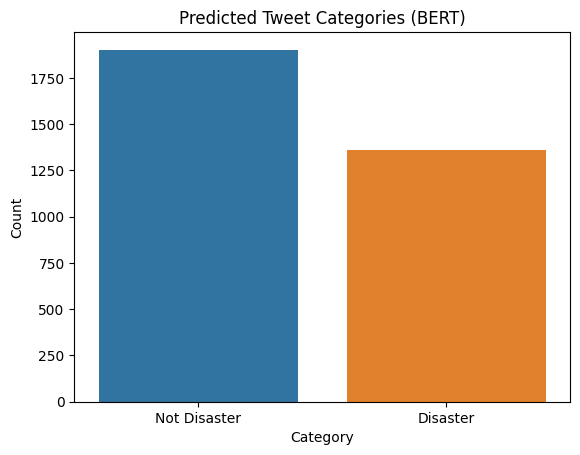

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = predictions_df['target'].value_counts().reset_index()

# Rename the columns for easier plotting
target_counts.columns = ['target', 'count']

# Create the bar plot
sns.barplot(x='target', y='count', data=target_counts)

# Set the x-axis labels
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])

# Set the title and labels for the plot
plt.title('Predicted Tweet Categories (BERT)')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()


#Text classification using RoBERTa#

 - ***RoBERTa is an improved version of BERT with more training data, longer training time, and better pre-processing.***
 - ***Comparison between predictions may give a better understanding of likelihood of overfitting and underfitting by each model.***
 - ***Will remove the token_type_ids attribute because RoBERTa doesn't use them.***

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop(['location', 'keyword'], axis=1, inplace=True)
test.drop(['location', 'keyword'], axis=1, inplace=True)

In [ ]:
from transformers import InputExample, InputFeatures
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import numpy as np
import tensorflow as tf

# Functions: convert_data_to_examples, convert_examples_to_features remain the same

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
max_seq_length = 128

train_input_features = convert_examples_to_features(train_input_examples, tokenizer, max_seq_length)

def create_dataset(input_features):
    all_input_ids = []
    all_attention_mask = []
    all_labels = []

    for feature in input_features:
        all_input_ids.append(feature.input_ids)
        all_attention_mask.append(feature.attention_mask)
        all_labels.append(feature.label)

    return tf.data.Dataset.from_tensor_slices(
        (
            {
                "input_ids": tf.constant(all_input_ids, shape=(len(all_input_ids), max_seq_length), dtype=tf.int32),
                "attention_mask": tf.constant(all_attention_mask, shape=(len(all_attention_mask), max_seq_length), dtype=tf.int32),
            },
            tf.constant(all_labels, shape=(len(all_labels),), dtype=tf.int32)
        )
    )

model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

train_dataset = create_dataset(train_input_features).shuffle(len(train)).batch(32)
model.fit(train_dataset, epochs=3)

test_input_examples = convert_data_to_examples(test["text"], np.zeros(len(test), dtype=int))
test_input_features = convert_examples_to_features(test_input_examples, tokenizer, max_seq_length)
test_dataset = create_dataset(test_input_features).batch(32)

predictions = model.predict(test_dataset)
pred_labels = np.argmax(predictions.logits, axis=1)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
238/238 [==============================] - 229s 761ms/step - loss: 0.4428 - accuracy: 0.8015
Epoch 2/3
238/238 [==============================] - 187s 785ms/step - loss: 0.3515 - accuracy: 0.8560
Epoch 3/3
102/102 [==============================] - 31s 276ms/step


In [ ]:
predictions_df_roberta = pd.DataFrame({'id': test['id'], 'target': pred_labels})
predictions_df_roberta

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


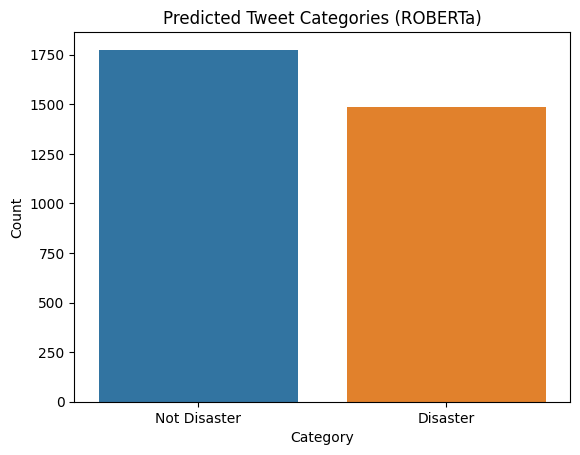

In [ ]:
# Count the occurrences of each target value
target_counts = predictions_df_roberta['target'].value_counts().reset_index()

# Rename the columns for easier plotting
target_counts.columns = ['target', 'count']

# Create the bar plot
sns.barplot(x='target', y='count', data=target_counts)

# Set the x-axis labels
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])

# Set the title and labels for the plot
plt.title('Predicted Tweet Categories (ROBERTa)')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

#Conclusion#

From the training results,  the BERT model  performs slightly better than the RoBERTa model in terms of both loss and accuracy. However,  these results may not be conclusive, as factors such as random initialization, learning rate, and the number of training epochs can affect the performance of both models.

Regarding overfitting and underfitting:

Overfitting occurs when the model learns the training data too well, including the noise and irrelevant patterns, which results in poor generalization to new test data. It is usually indicated by a large gap between training and validation/test accuracy, and a continuously decreasing loss during training. In the given training results, neither BERT nor RoBERTa appear to be overfitting, as the loss values decrease and the accuracy values improve reasonably over the three epochs.

Underfitting, on the other hand, occurs when the model fails to learn the underlying patterns of the data, resulting in poor performance on both training and validation/test data. Here, both BERT and RoBERTa achieve reasonably high accuracy on the training data, suggesting that they are not underfitting.

Still, to better understand the differences in training between the BERT and RoBERTa models and to assess their potential for overfitting or underfitting, we can evaluate the models on a separate validation dataset and compare the performance. Also, experimenting with different hyperparameters, such as learning rate, batch size, and the number of training epochs, can reveal  the optimal settings for each model.



In [ ]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   3263 non-null   int64
 1   id      3263 non-null   int64
 2   target  3263 non-null   int64
dtypes: int64(3)
memory usage: 76.6 KB


In [ ]:
predictions_df_roberta = predictions_df_roberta.reset_index()

In [ ]:
from google.colab import files

predictions_df_roberta.to_csv('predictions_df_roberta.csv', index=False)

In [ ]:
files.download('predictions_df_roberta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>